In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

test_data = '/content/drive/MyDrive/4.1/PRML Lab/train_knn.txt'

df = pd.read_csv(test_data, sep=",",  names = ['A', 'B', 'Label'])

df

,A,B,Label
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1
7,3,4,2
8,2,3,2
9,3,2,2


In [65]:
X1 = np.array(df['A'])
X2 = np.array(df['B'])
X3 = np.array(df['Label'])
trans_x = np.array([X1,X2,X3]).T
trans_x

array([[7, 7, 1],
       [7, 4, 1],
       [6, 4, 1],
       [7, 5, 1],
       [7, 6, 1],
       [6, 7, 1],
       [6, 6, 1],
       [3, 4, 2],
       [2, 3, 2],
       [3, 2, 2],
       [4, 3, 2],
       [3, 3, 2],
       [4, 4, 2],
       [1, 4, 2]])

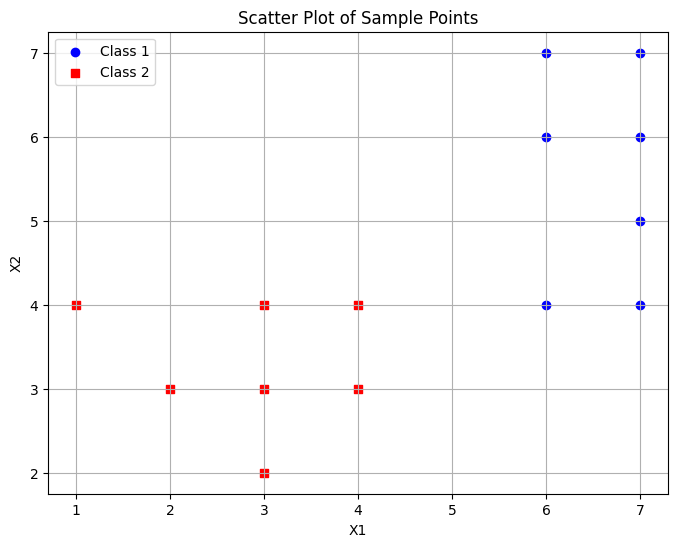

In [66]:
X1 = df['A']
X2 = df['B']
classes = df['Label']


class_1 = df[classes == 1]
class_2 = df[classes == 2]


plt.figure(figsize=(8, 6))
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], color='blue', marker='o', label='Class 1')
plt.scatter(class_2.iloc[:, 0], class_2.iloc[:, 1], color='red', marker='s', label='Class 2')


plt.title("Scatter Plot of Sample Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()



In [67]:

test_data = '/content/drive/MyDrive/4.1/PRML Lab/test_knn.txt'

dt = pd.read_csv(test_data, sep=",",  names = ['x1', 'x2'])

dt

,x1,x2
0,3,7
1,7,7
2,4,3
3,2,8
4,3,5
5,1,2
6,4,8
7,8,3
8,8,4


In [68]:
T1 = np.array(dt['x1'])
T2 = np.array(dt['x2'])

X_test = np.array([T1, T2]).T
X_test




array([[3, 7],
       [7, 7],
       [4, 3],
       [2, 8],
       [3, 5],
       [1, 2],
       [4, 8],
       [8, 3],
       [8, 4]])

In [69]:
X_train = np.array(df[['A', 'B']])
y_train = np.array(df['Label'])


In [70]:
!pip install scipy

In [71]:
from scipy.spatial.distance import cdist

In [74]:
def euclidean_distance(X_train, X_test):
    return cdist(X_test, X_train, metric='euclidean')

def knn_classifier(X_train, y_train, X_test, K):

    distances = euclidean_distance(X_train, X_test)

    predictions = []
    for distance in distances:

        k_nearest_indices = np.argsort(distance)[:K]
        k_nearest_labels = y_train[k_nearest_indices]

        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

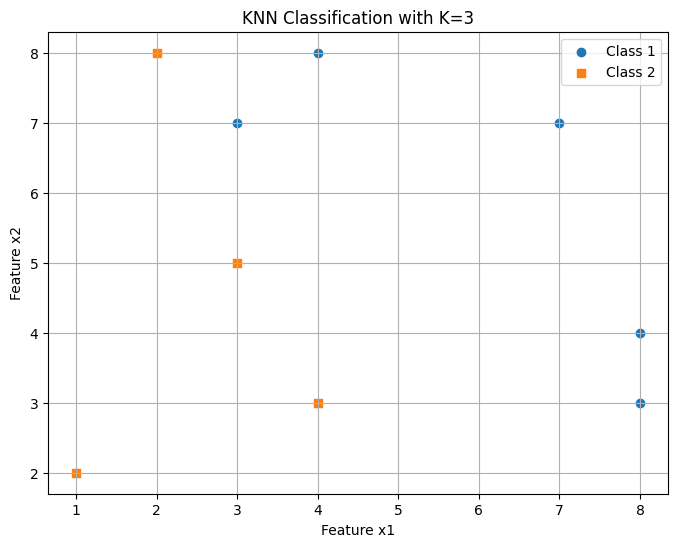

In [75]:
K = 3

# Classify
predicted_labels = knn_classifier(X_train, y_train, X_test, K)


plt.figure(figsize=(8, 6))

# Plot
for class_label in np.unique(predicted_labels):
    class_data = dt[predicted_labels == class_label]

    plt.scatter(class_data['x1'], class_data['x2'], label=f'Class {class_label}', marker='o' if class_label == 1 else 's')

plt.title(f"KNN Classification with K={K}")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.grid(True)
plt.show()

In [79]:
def print_knn_results(X_test, K, distances, y_train):
    for idx, distance in enumerate(distances):
        k_nearest_indices = np.argsort(distance)[:K]
        k_nearest_labels = y_train[k_nearest_indices]
        k_nearest_distances = distance[k_nearest_indices]

        print(f"Test point: {X_test[idx][0]}, {X_test[idx][1]}")
        for i in range(K):
            print(f"Distance {i+1}: {k_nearest_distances[i]} Class: {k_nearest_labels[i]}")

        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique[np.argmax(counts)]
        print(f"Predicted class: {predicted_label}\n")

In [80]:
K = 3

# Calculate distances here
distances = euclidean_distance(X_train, X_test)

predictions = knn_classifier(X_train, y_train, X_test, K)

# Pass distances to the function
print_knn_results(X_test, K, distances, y_train)

Test point: 3, 7
Distance 1: 3.0 Class: 1
Distance 2: 3.0 Class: 2
Distance 3: 3.1622776601683795 Class: 1
Predicted class: 1

Test point: 7, 7
Distance 1: 0.0 Class: 1
Distance 2: 1.0 Class: 1
Distance 3: 1.0 Class: 1
Predicted class: 1

Test point: 4, 3
Distance 1: 0.0 Class: 2
Distance 2: 1.0 Class: 2
Distance 3: 1.0 Class: 2
Predicted class: 2

Test point: 2, 8
Distance 1: 4.123105625617661 Class: 1
Distance 2: 4.123105625617661 Class: 2
Distance 3: 4.123105625617661 Class: 2
Predicted class: 2

Test point: 3, 5
Distance 1: 1.0 Class: 2
Distance 2: 1.4142135623730951 Class: 2
Distance 3: 2.0 Class: 2
Predicted class: 2

Test point: 1, 2
Distance 1: 1.4142135623730951 Class: 2
Distance 2: 2.0 Class: 2
Distance 3: 2.0 Class: 2
Predicted class: 2

Test point: 4, 8
Distance 1: 2.23606797749979 Class: 1
Distance 2: 2.8284271247461903 Class: 1
Distance 3: 3.1622776601683795 Class: 1
Predicted class: 1

Test point: 8, 3
Distance 1: 1.4142135623730951 Class: 1
Distance 2: 2.23606797749979 